## 1. Business Understanding

SyriaTel, a telecommunications company, faces a significant challenge with customer churn, where a significant portion of their customer base is leaving. This not only results in lost revenue but also increases the cost of acquiring new customers to replace those who churn. Given the competitive nature of the telecommunications industry, retaining existing customers is often more cost-effective than acquiring new ones. Therefore, reducing churn is vital for sustaining revenue streams, enhancing profitability, and maintaining market share.

The goal of this project is **to develop a predictive model that can accurately identify customers who are at risk of leaving the service in the near future**. 
By leveraging data-driven insights, SyriaTel can better understand the factors driving customer churn and implement targeted interventions to retain at-risk customers. These interventions might include personalized offers, enhanced customer support, and proactive engagement strategies, which are essential for reducing churn rates and increasing customer lifetime value.

Moreover, a deep understanding of churn patterns will enable SyriaTel to optimize its marketing and operational efforts, ensuring that resources are allocated effectively. The insights derived from this analysis will not only help in improving customer loyalty but will also support long-term strategic planning and decision-making, providing SyriaTel with a competitive edge in a crowded market.

### Objectives : 
1. **To develop a predictive model that can accurately identify customer churn.**
2. To Identify key drivers of churn
3. Accurately predict at-risk customers.
4. Measure Impact of Retention Strategies.


To fulfill the above objective, there are a few questions we need to answer, such as :
* What is the distribution of churn in our dataset?
* What factors contibute most to customer churn?
* 

## 2. Data Understanding

This project utilizes [this dataset from kaggle.](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset). Each record is a customer
This dataset contains 3333 records and 21 columns.

The dataset contains a variety of features: 
* `state` - categorical variable denoting the state a customer is registered in.
* `account length` - The duration of the customer's account in terms of days.
* `area code` - The area code associated with the customer's phone number.
* `international plan` -  Whether the customer has an international calling plan (Yes/No).
* `voice mail plan` -  Whether the customer has a voice mail plan (Yes/No).
* `number of voicemail messages` - The number of voicemail messages the customer has.
* `total day minutes` - The total number of minutes the customer used during the daytime.
* `total day calls` - The total number of calls made by the customer during the daytime.
* `total day charge` - The total charge for daytime usage.
* `total evening minutes` - The total number of minutes the customer used during the evening.
* `total evening calls` - The total number of calls made by the customer during the evening.
* `total evening charge` - The total charge for evening usage.
* `total night minutes` - The total number of minutes the customer used during the night.
* `total night calls` - The total number of calls made by the customer during the night.
* `total night charge` - The total charge for night usage.
* `total international minutes` - The total number of international minutes used by the customer.
* `total international calls` - The total number of international calls made by the customer.
* `total international charge` - The total charge for international usage.
* `number of customer service calls` - The number of customer service calls made by the customer.
* `churn` - The target variable indicating whether the customer has churned or not (Yes/No).

For this project, we are trying to predict `Churn`, hence it is our target variable.

## 3. Data Preparation and Cleaning

### 3.1 Reading the Data

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# import machine learning libraries and functions
from sklearn.base import clone
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, recall_score, roc_curve, auc
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier

In [2]:
# load the dataset
churn_df = pd.read_csv('data/telecom_churn_dataset.csv')
# preview first five rows
churn_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


From previewing the dataset above,  I noticed the column names are separated by spaces. Here, I replace them with underscores for easier readability and convention purposes.

In [3]:
# replace spaces with undescores in column names
churn_df.columns = churn_df.columns.str.replace(' ', '_')
# churn_df.head()

### 3.2 Understanding the Dataset

Here, we aim to undestand the structure of our dataset. This involves checking the number of rows and columns, the datatypes of our columns and previewing the dataset.

In [4]:
# print shape of the dataset
churn_df.shape

(3333, 21)

In [5]:
# get basic information of the dataset
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

Our dataset has 3,333 records and 21 columns. 

We notice that `area_code` is of the integer datatype. This is should be casted to a categorical variable.

Moreover,  `churn` is `Boolean` with True/False values. To be able to work with this column, we need to cast it into 0s and 1s.

### 3.3 Data Type conversions

From previewing the dataset, We identified columns that need to be casted into their correct datatypes. 

In [6]:
# Convert 'area code' from int to categorical
churn_df['area_code'] = churn_df['area_code'].astype('object')

# Verify the change
# print(churn_df['area_code'].dtype)


### 3.4 Checking and Handling Missing and Duplicate Values  

In [7]:
# check for missing values in the dataset
churn_df.isnull().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [8]:
# check for duplicate records
churn_df.duplicated().sum()

0

From the above process, we notice that we do not have any missing values or duplicate records. Therefore, we move to the next step of descriptive statistics.

In [9]:
# summary statistics of our dataset
churn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
number_vmail_messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total_day_minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total_day_calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total_day_charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total_eve_minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total_eve_calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total_eve_charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total_night_minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00
total_night_calls,3333.0,100.107711,19.568609,33.00,87.00,100.00,113.00,175.00


In [10]:
# the phone_number attribute has no predictive power. Therefore, we drop it
churn_df = churn_df.drop(columns = ['phone_number'], axis = 1)

### 3.4 Checking for outliers 
Outliers can often skew our analysis and models generated using the data. It is therefore important to check if they exist and deal with them.

Here, I will use the Interquartile Range (IQR) method to check for outliers in the numeric columns.

In [11]:
# # Using IQR method to remove outliers. Write function to remove outliers from a dataset using the IQR method.
    
def remove_outliers(df, column):
    # Check if the column is numeric
    if df[column].dtype in ['float64', 'int64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    # Always return the DataFrame
    return df


In [12]:

columns_int = churn_df.columns

# Start with the original DataFrame and apply outlier removal iteratively
churn_without_outliers = churn_df.copy()
for col in columns_int:
    churn_without_outliers = remove_outliers(churn_without_outliers, col)
    
# Check the shape of the DataFrame without outliers
print(churn_without_outliers.shape)

(2797, 20)


## 4. Exploratory Data Analysis 

### 4.1 Univariate Analysis

This involves the examination of a single variable. The primary objective is to describe the data and find patterns within it. It helps us understand the central tendency, the distribution and spread of our data.

To do so, we will use distribution plots such as histograms, Box plots and bar plots.

#### 4.1.1 Distribution of `churn` in our dataset (target variable)

In [13]:
# churn distibution
churn_distribution = churn_df['churn'].value_counts()
churn_distribution

churn
False    2850
True      483
Name: count, dtype: int64

In [14]:
churn_distribution = churn_df['churn'].value_counts(normalize = True)
churn_distribution

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

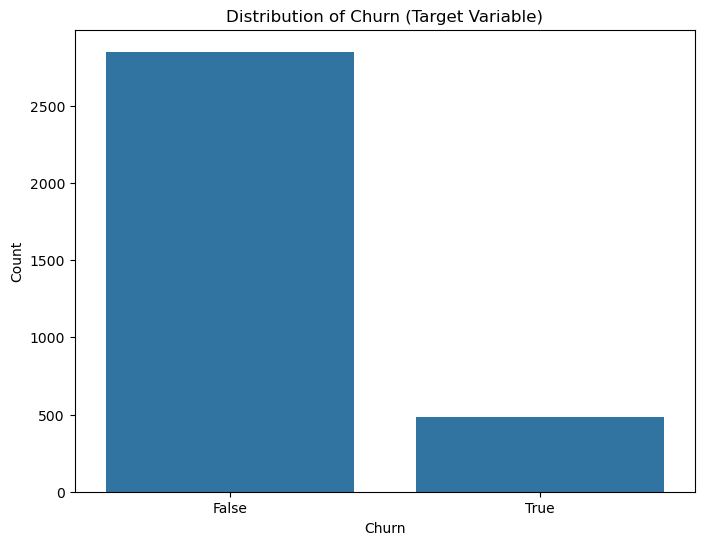

In [15]:
# plot the churn distribution (target variable)

plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=churn_df)
plt.title('Distribution of Churn (Target Variable)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

Out of the 3,333 customers 483 have terminated their contract i.e., about 14.5% of customers lost.

Moreover, we notice that this dataset is highly imbalanced, with a much larger number of non-churned customers (2,850) compared to churned customers (483).This imbalance is common in churn prediction problems, where the majority of customers typically do not churn.

This implies that if our model always predicted that a customer will not churn(majority class), the model would be about 85.6% accurate. 

We shall implement strategies to remedy this imbalance.

#### 4.1.2 Distribution of categorical features

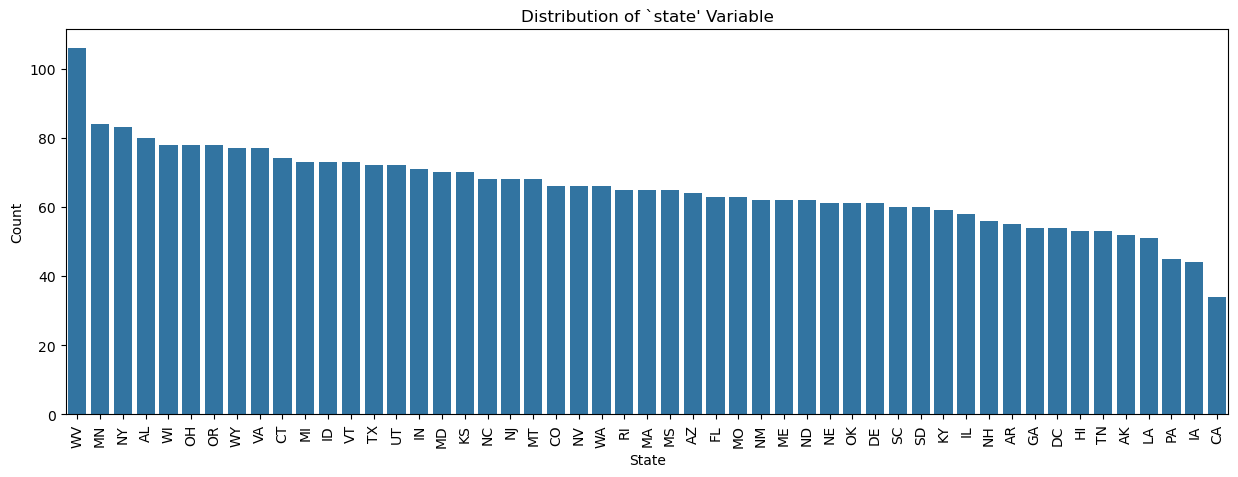

In [16]:
# plot distribution of `state`
plt.figure(figsize=(15,5))
sns.countplot(x='state', data=churn_df, order=churn_df['state'].value_counts().index)
plt.title("Distribution of `state' Variable")
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [17]:
churn_df['area_code'].value_counts(normalize = True)

area_code
415    0.496550
510    0.252025
408    0.251425
Name: proportion, dtype: float64

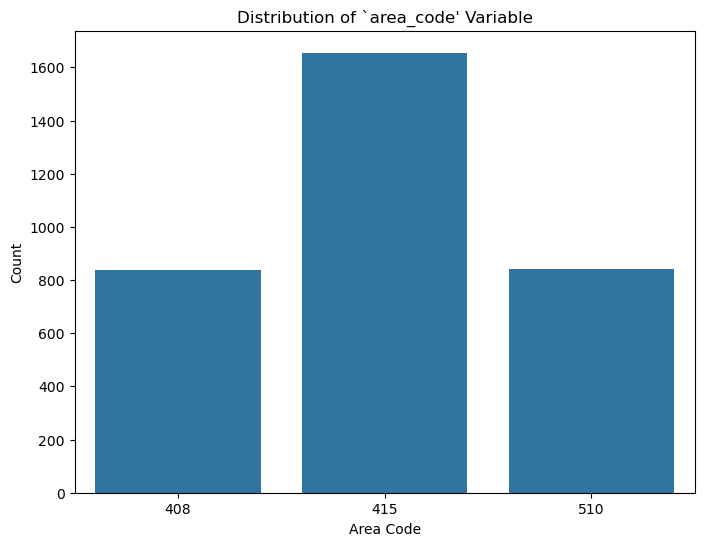

In [18]:
# plot distribution of `area_code`
plt.figure(figsize=(8, 6))
sns.countplot(x='area_code', data=churn_df)
plt.title("Distribution of `area_code' Variable")
plt.xlabel('Area Code')
plt.ylabel('Count')
plt.show()

We notice that about 49.7% of our customers are from `area_code` 415, 25.2% from `area_code` 510 and 25.1% from `area_code`408.

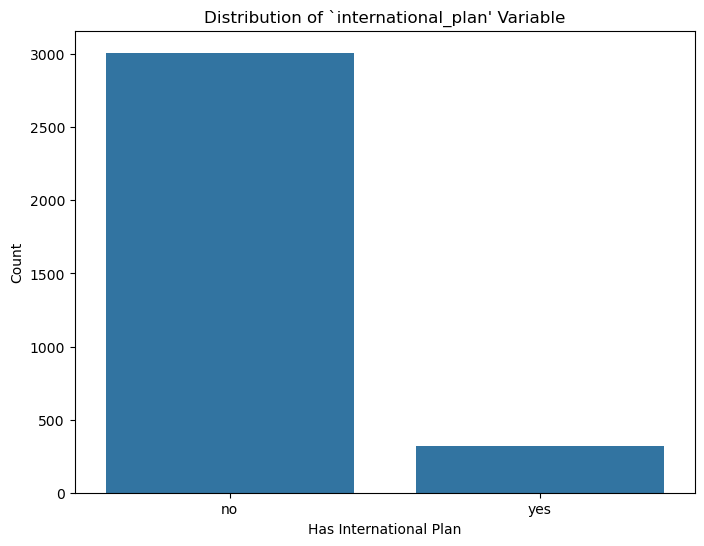

In [19]:
# plot distribution of `international_plan`
plt.figure(figsize=(8, 6))
sns.countplot(x='international_plan', data=churn_df)
plt.title("Distribution of `international_plan' Variable")
plt.xlabel('Has International Plan')
plt.ylabel('Count')
plt.show()

In [20]:
churn_df['international_plan'].value_counts(normalize = True)

international_plan
no     0.90309
yes    0.09691
Name: proportion, dtype: float64

About 90.3% of our customers do not have an international plan while only 9.7% have the plan.

In [21]:
churn_df['voice_mail_plan'].value_counts(normalize = True)


voice_mail_plan
no     0.723372
yes    0.276628
Name: proportion, dtype: float64

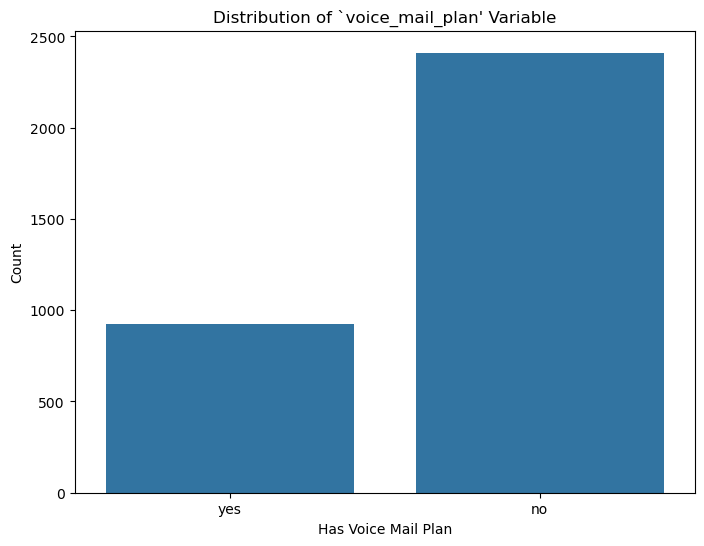

In [22]:
# plot distribution of voice_mail_plan
plt.figure(figsize=(8, 6))
sns.countplot(x='voice_mail_plan', data=churn_df)
plt.title("Distribution of `voice_mail_plan' Variable")
plt.xlabel('Has Voice Mail Plan')
plt.ylabel('Count')
plt.show()

About 27.7% of our customers have a voice mail plan with a majority (about 72.3%) not having a voice mail plan.

#### 4.1.3 Distribution of numerical features

In [23]:
# identify columns that contribute most to customer churn
# identify numerical columns
churn_numeric = churn_df.select_dtypes(include = ['number'])
churn_numeric.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


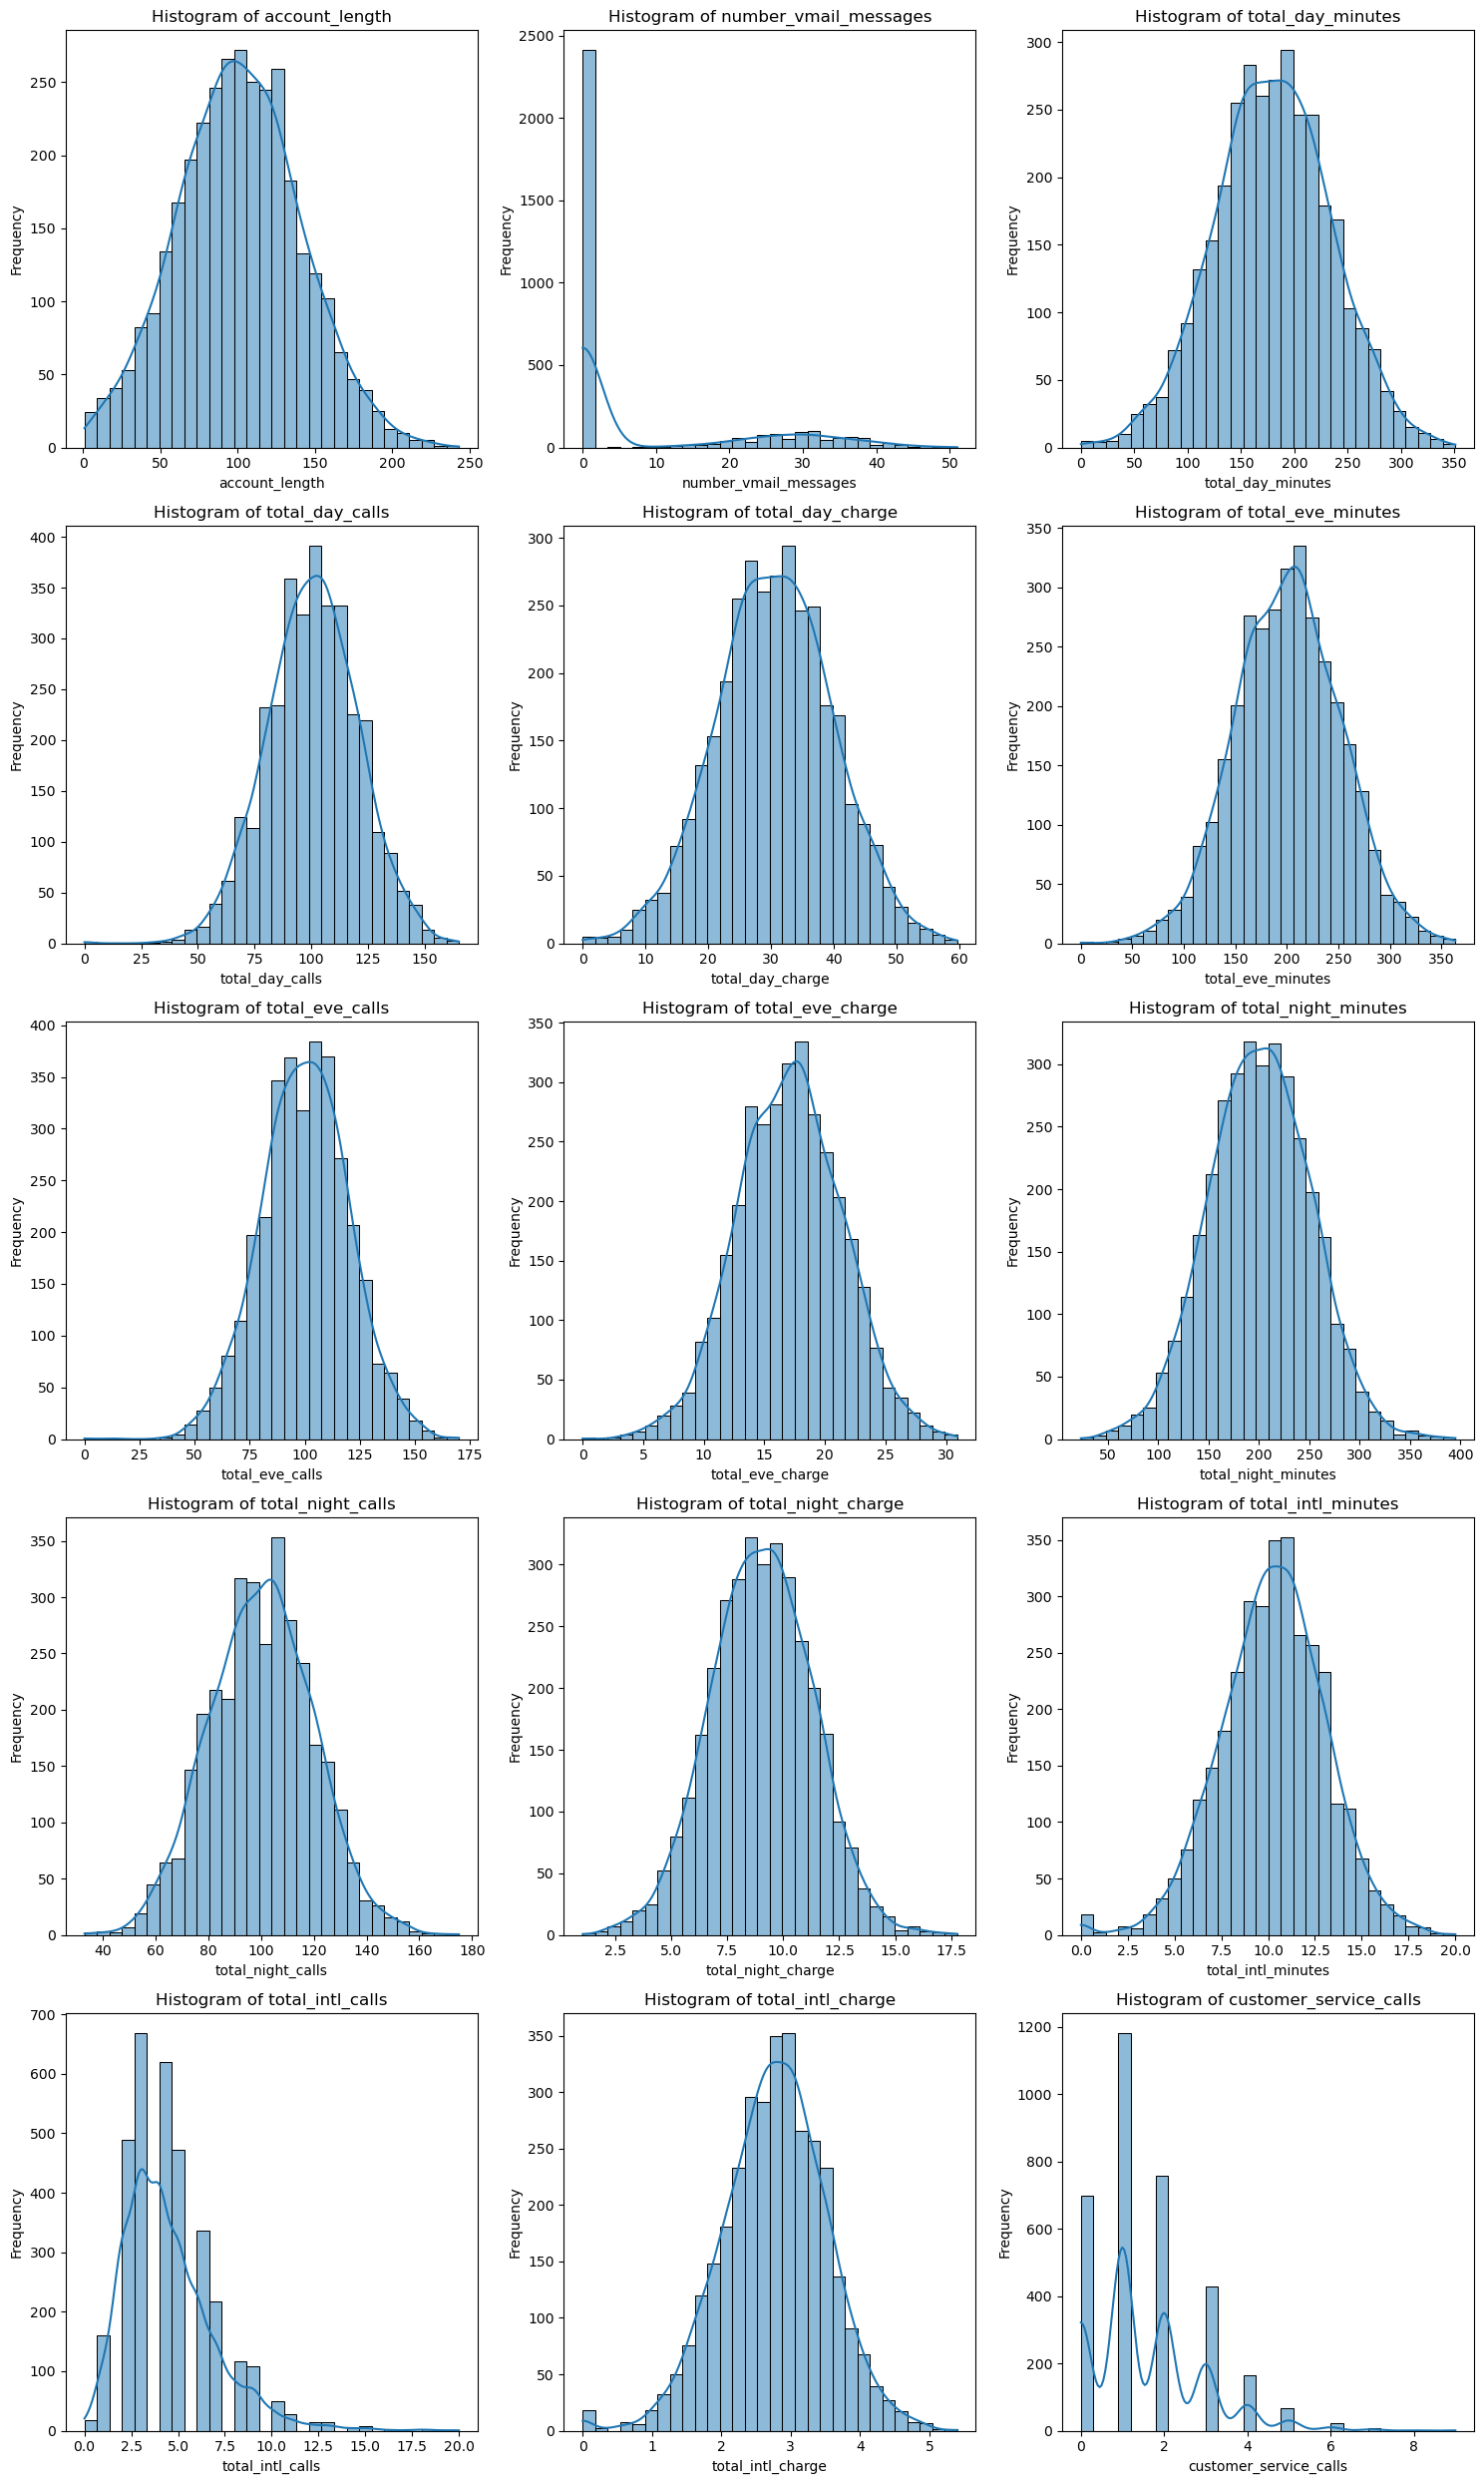

In [24]:
numerical_cols = churn_numeric.columns
# Determine the number of rows and columns for the grid
num_cols = 3  # Adjust based on your preference
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols  # Compute number of rows needed

# Set up the matplotlib figure
plt.figure(figsize=(15, 5 * num_rows))

# Create a histogram for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(churn_numeric[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()



We notice that most of the numerical columns' ditributions follow a normal distribution curve with the exception of `voice_mail_messages` and `customer_service_calls`. `Total_intl_calls` has a right skewed distribution.

### 4.2 Bivariate Analysis

In this section,we explore the relationship or association between two variables in the dataset. More specifically, the relationship between other variables and `churn` It allows us to examine how changes in one variable are related to changes in another variable.

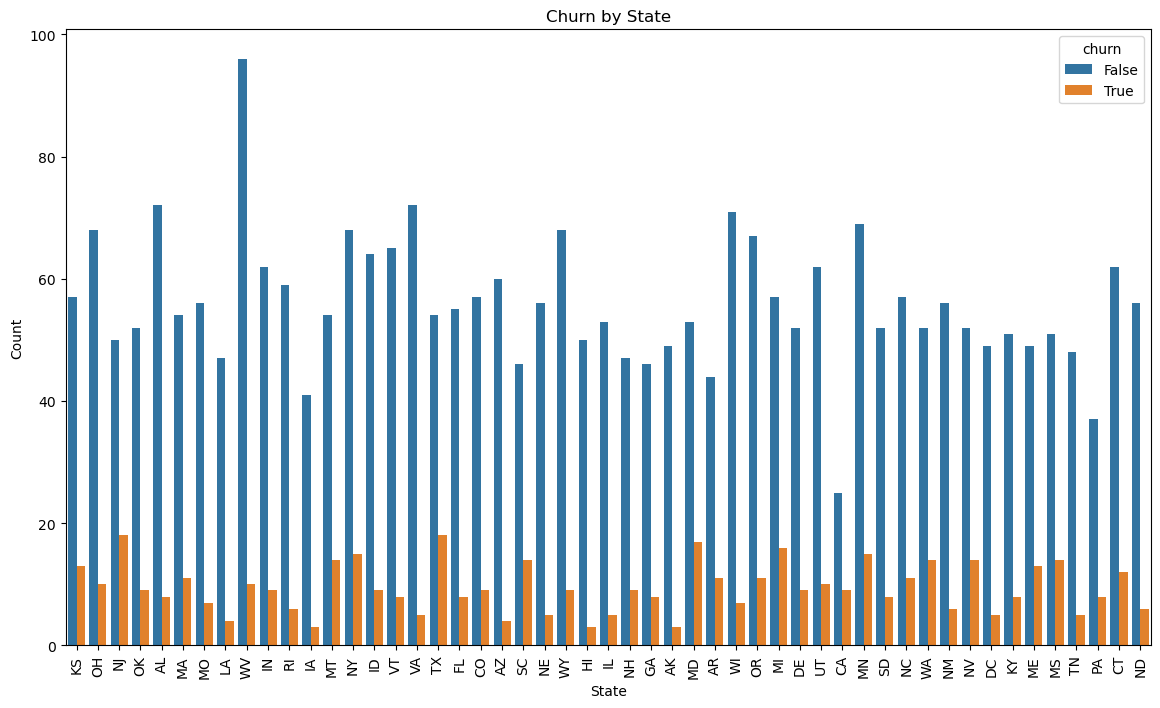

In [25]:
fig, ax = plt.subplots(figsize = (14, 8))
# plot graph to show churn by state
sns.countplot(x='state', hue='churn', data=churn_df)
plt.title('Churn by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


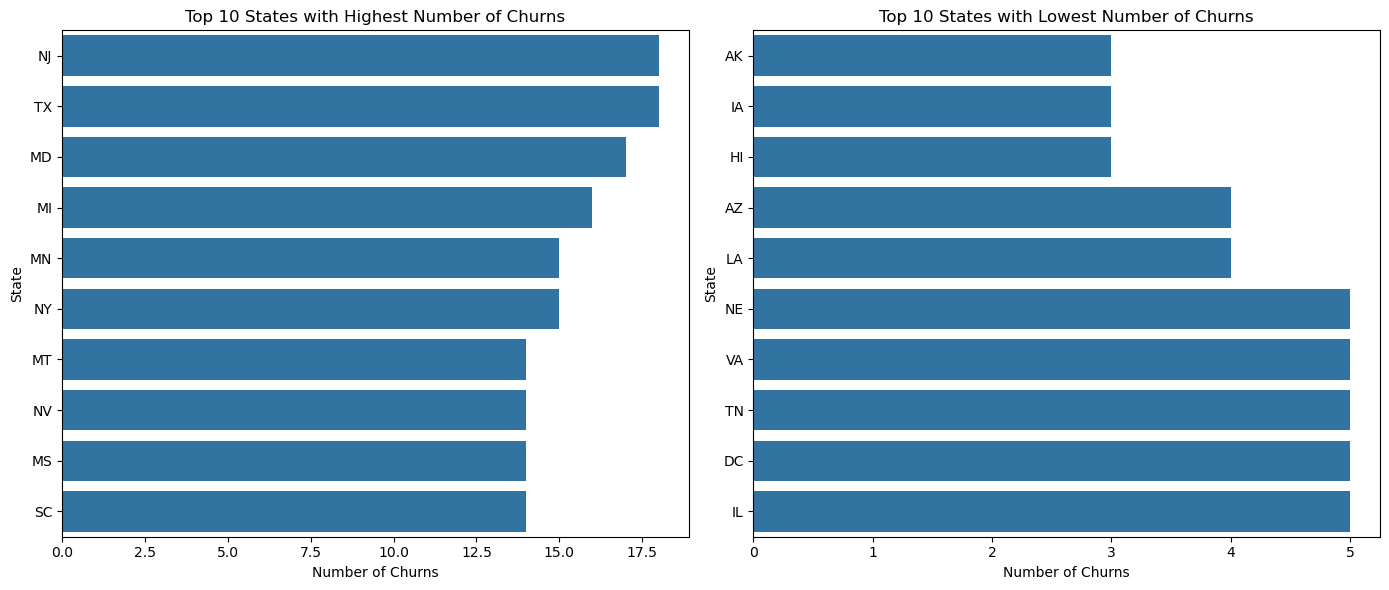

In [59]:
# group states by churn -top and lowest 10
# Count churns by state
churn_by_state_top = churn_df[churn_df['churn'] == 1].groupby('state').size().sort_values(ascending=False).head(10)
churn_by_state_low = churn_df[churn_df['churn'] == 1].groupby('state').size().sort_values(ascending=True).head(10)


# Set up the figure and subplots
plt.figure(figsize=(14, 6))

# Plot for Top 10 States
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x=churn_by_state_top.values, y=churn_by_state_top.index)
plt.title('Top 10 States with Highest Number of Churns')
plt.xlabel('Number of Churns')
plt.ylabel('State')

# Plot for Lowest 10 States
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(x=churn_by_state_low.values, y=churn_by_state_low.index)
plt.title('Top 10 States with Lowest Number of Churns')
plt.xlabel('Number of Churns')
plt.ylabel('State')

# Adjust layout and show the plots
plt.tight_layout()
plt.savefig('top_and_lowest_churn_states')
plt.show()


New Jersey, Texas and Maryland have reported the highest customer churn numbers. Moreover, Alaska, Iowa and Hawaii reported the lowest churn numbers. 

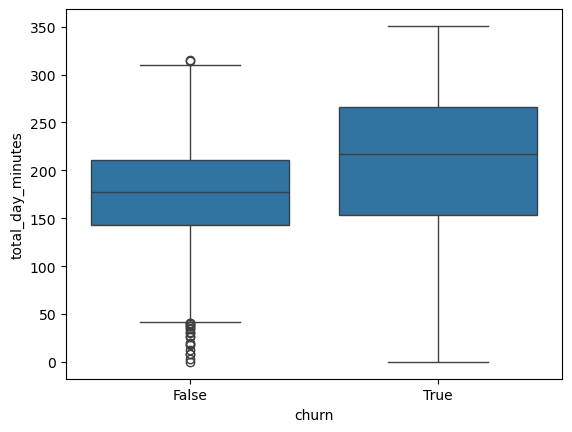

In [27]:
# Bivariate Analysis: Churn vs Numerical Features
sns.boxplot(x='churn', y='total_day_minutes', data=churn_df)
plt.show()



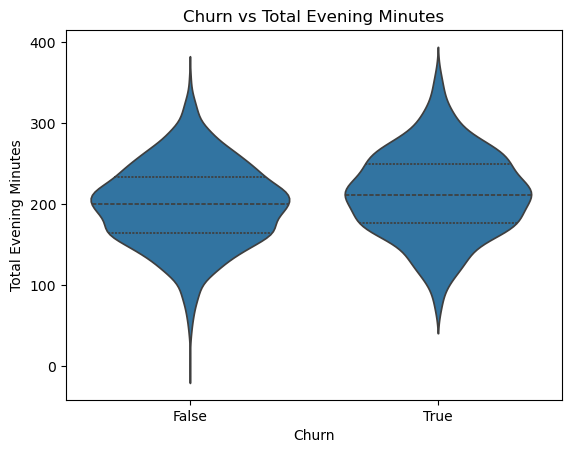

In [28]:
sns.violinplot(x='churn', y='total_eve_minutes', data=churn_df, inner='quartile')
plt.title('Churn vs Total Evening Minutes')
plt.xlabel('Churn')
plt.ylabel('Total Evening Minutes')
plt.show()


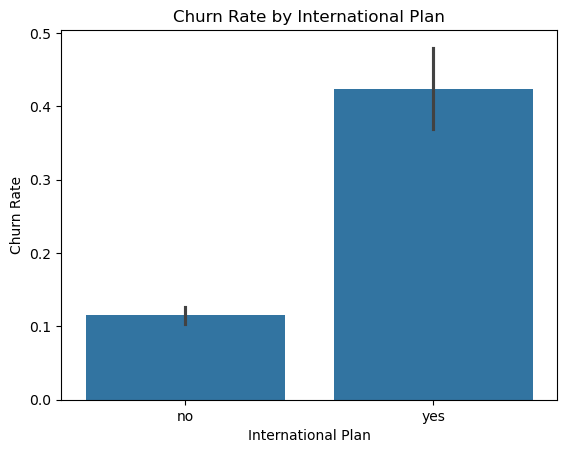

In [29]:
# plot churn rate by whether or not a customer has an international plan
sns.barplot(x='international_plan', y='churn', data=churn_df)
plt.title('Churn Rate by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Churn Rate')
plt.show()


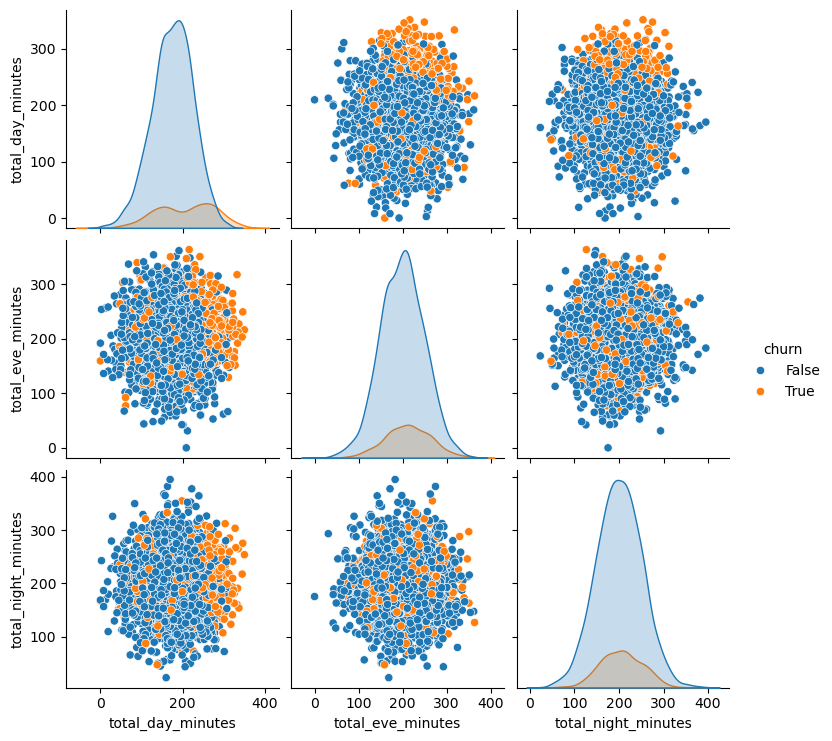

In [30]:
sns.pairplot(churn_df[['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'churn']], hue='churn')
plt.show()


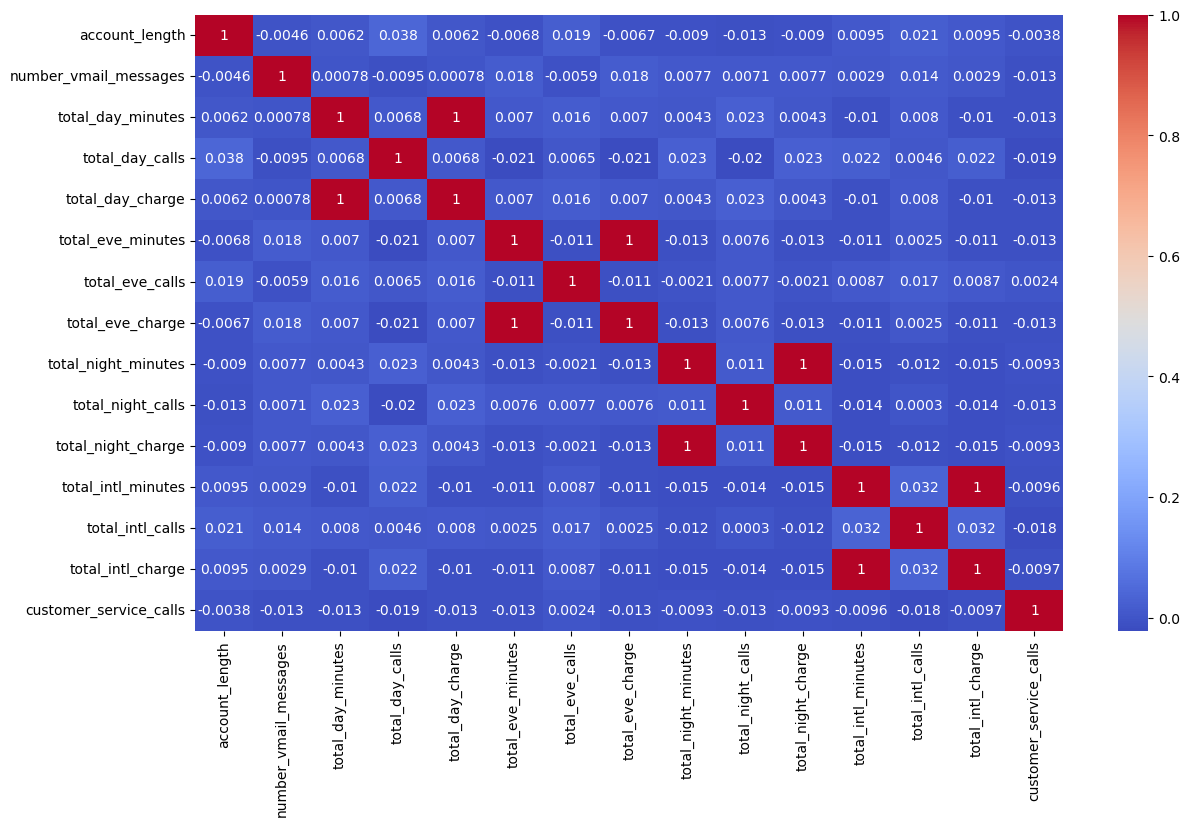

In [31]:
# Correlation Matrix
fig, ax = plt.subplots(figsize = (14,8))
# select numeric data 
numerical_churn = churn_df.select_dtypes(include = ['number'] )
corr_matrix = numerical_churn.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

We notice that some features are highly correlated: 


# 5. Data Modeling


The goal of this project is to predict which customers are at a risk or churning in the near future. Since this entails classifying a customer into `Churn` or `Not Churn`, it is a **classification** problem. 

To achieve this target, we are going to use the following algorithms:
* Logistic Regression
* Decision Trees

We We will tune the hyperparameters to improve perfomance if need be. This model will be evaluted using recall and the AUC metrics since the  cost of missing a churner is higher than falsely identifying one. Moreover, it is pertinent to balance between the false positives and false negatives.

### 5.1 Preparation of Data for Modeling

Our targetcolumn, `churn`, is in Boolean format. It can not be used in modelling as is. Therefore, we need to encode it to 0s and 1s. 

Moreover, we have some categorical variables (`state`, `area_code`, `international_plan` and `voice_mail_plan`) that should be encoded into numerical values. These columns have no inherent order, thus we will use one hot encoding. 

In [32]:
# Encode 'churn' column: True -> 1, False -> 0
churn_df['churn'] =churn_df['churn'].astype(int)

In [33]:
# One-hot encode other categorical variables
churn_encoded = pd.get_dummies(churn_df, columns=['state', 'international_plan', 'voice_mail_plan'], drop_first=True, dtype = int)


In this step, we split the data into training and testing set. 

Since this is an imbalanced dataset, we will use `stratify = y` argument to ensure an even balance of the `churn` class. 

In [34]:
# select 'X' and 'y'
X = churn_encoded.drop(columns = ['churn'], axis = 1)
y = churn_encoded['churn']

# split 'X' and 'y' with a random state of 42

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

Our numerical variables have different units, i.e., number of days, currency and minutes. Therefore, we should apply scaling to these features. 

In [35]:
X_train.head()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international_plan_yes,voice_mail_plan_yes
556,123,408,0,159.5,77,27.12,303.8,92,25.82,226.9,...,0,0,0,0,0,0,0,0,0,0
2596,73,408,0,122.0,92,20.74,138.3,114,11.76,224.2,...,0,0,0,0,0,0,0,0,0,0
944,81,415,28,167.9,147,28.54,190.7,105,16.21,193.0,...,0,0,0,0,0,0,0,0,0,1
1152,16,408,0,209.5,89,35.62,172.8,85,14.69,94.1,...,0,0,0,0,0,0,0,0,0,0
3060,94,415,0,212.1,98,36.06,189.4,89,16.10,352.2,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# instantiate scaler object 
scaler = StandardScaler()

X_train_numeric = X_train[numerical_cols]
X_test_numeric = X_test[numerical_cols]


# Fit and transform the training data
X_train_scaled_numeric = scaler.fit_transform(X_train_numeric)

# Transform the test data
X_test_scaled_numeric = scaler.transform(X_test_numeric)


# Reset indices before combining. Without this step, NAN values may be introduced to the dataframe making it 
# unusable for modelling
X_train_scaled_numeric_df = pd.DataFrame(X_train_scaled_numeric, columns=numerical_cols, index=X_train.index)
X_test_scaled_numeric_df = pd.DataFrame(X_test_scaled_numeric, columns=numerical_cols, index=X_test.index)

# Combine scaled numeric features with one-hot encoded features
X_train_scaled = pd.concat([pd.DataFrame(X_train_scaled_numeric_df, columns=numerical_cols), 
                            X_train.drop(columns=numerical_cols)], axis=1)
X_test_scaled = pd.concat([pd.DataFrame(X_test_scaled_numeric_df, columns=numerical_cols), 
                           X_test.drop(columns=numerical_cols)], axis=1)


From the Exploratory Data Analysis process, we noticed a high imbalance in our target variable. Therefore, in the next step, we wre going to use SMOTE resampling technique to oversample our minority with synthetic samples.

In [37]:
# SMOTE Resampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

### 5.2 Build a Baseline Model

In [38]:
# Instantiate a LogisticRegression with random_state=42
baseline_model = LogisticRegression(random_state = 42)

# fit model
baseline_model.fit(X_train_resampled, y_train_resampled)

C:\Users\Banda\anaconda3\envs\learn-env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [39]:
# Evaluate the model

# Predictions on the testing set
y_pred = baseline_model.predict(X_test_scaled)

# Model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Model Accuracy: 0.7985611510791367
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       713
           1       0.36      0.51      0.42       121

    accuracy                           0.80       834
   macro avg       0.64      0.68      0.65       834
weighted avg       0.83      0.80      0.81       834



We noticed before that if our model always predicted that a customer will not churn(majority class), the model would be about 85.6% accurate.

The baseline model has an accuracy of about 79.9%, which implies that out of all predictions made, about 79.9% were correct. 

The model has a recall score of about 51%. Out of all the customers who truly churn, 51% were correctly identified by the model as churners. This indicates that the model detects just over half of the actual churners. 
This also implies that the model misses 49% of the churners, which means that nearly half of the customers who will leave are not being correctly identified.

The model has a precision score of 36%. This implies that out of all the instances the model labelled `churn`, 36% were actually at risk of churning and the rest were incorrectly predicted as `churn`. This indicates that the model predictions are not very reliable.

The model has an F1-score of 42%. This implies that on average, the model is achieving a moderate balance between precision and recall. Thus, the model might be missing a significant number of positive instance and/or making a large number of incorrect positive predictions. 

This could be due to the `ConvergenceWarning` warning encountered in model-building above.Therefore, in the next step we are going to tune our hypeparameters to check whether a better score will be achieved. Moreover, we will use cross validation to further understand our model.

#### 5.2.1 Evaluating our baseline model with cross validation

In [40]:

def custom_cross_val_score(estimator, X, y):
    # Create arrays to hold the recall scores from each fold
    kfold_train_scores = np.ndarray(5)
    kfold_val_scores = np.ndarray(5)

    # Instantiate a splitter object
    kfold = StratifiedKFold(n_splits=5)
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
        # Extract train and validation subsets
        X_t, X_val = X.iloc[train_index], X.iloc[val_index]
        y_t, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Instantiate StandardScaler
        scaler = StandardScaler()
        # Fit and transform X_t
        X_t_scaled = scaler.fit_transform(X_t)
        # Transform X_val
        X_val_scaled = scaler.transform(X_val)
        
        # Instantiate SMOTE with random_state=42 
        sm = SMOTE(random_state=42)
        # Fit and transform X_t_scaled and y_t using SMOTE
        X_t_oversampled, y_t_oversampled = sm.fit_resample(X_t_scaled, y_t)
        
        # Clone the provided model and fit it on the training subset
        temp_model = clone(estimator)
        temp_model.fit(X_t_oversampled, y_t_oversampled)
        
        # Predict on both the training and validation subsets
        y_train_pred = temp_model.predict(X_t_oversampled)
        y_val_pred = temp_model.predict(X_val_scaled)
        
        # Evaluate the provided model on the train and validation subsets with recall
        recall_train = recall_score(y_t_oversampled, y_train_pred)
        recall_val = recall_score(y_val, y_val_pred)
        kfold_train_scores[fold] = recall_train
        kfold_val_scores[fold] = recall_val
        

    
    return kfold_train_scores, kfold_val_scores

# fit and evaluate model with cross validation
# model_with_preprocessing = LogisticRegression(random_state=42)
baseline_train_scores, baseline_val_scores = custom_cross_val_score(baseline_model, X_train, y_train)

# Mean recall scores for training and validation sets
mean_train_recall = baseline_train_scores.mean()
mean_val_recall = baseline_val_scores.mean()

print(f"Mean Training Recall: {mean_train_recall:.2f}")
print(f"Mean Validation Recall: {mean_val_recall:.2f}")


Mean Training Recall: 0.83
Mean Validation Recall: 0.67


The model has a recall score of 83% on the training set, this implies that the model is able to correctly identify 83% of the actual churn cases in the training data. Out of all the customers who actually churned, 83% were correctly predicted as churners during training.

The model has a recall score of 67% on the validation set, this implies that model correctly identifies 67% of the actual churn cases in the validation data. Thus, out of all the customers who churned in the validation set, 67% were correctly predicted as churners.

The validation recall is lower than the training recall. This could be due to overfitting as the model generalizes well on the training set as compared to the validation set.

Moreover, notice that we no longer encounter the `ConvergenceWarning` warning. Therefore, in the next step, we are going to tune our hyperparameters to see if we can improve perfomance.

### 5.3 Hyperparameter Tuning on the Baseline Model (Model 2)
To try and improve our model performance, we use GridSearchCV to create a hyperparameter grid for alternative parameters for the `solver`, `C`, `class_weight`, `penalty` and `max_iter`. 

The `max_iter` was adjusted for different runtimes until an optimal one was reached at. This takes quite a while to run. I have commented out the code below for future reference. In a separate code block, I have used the best parameters from the `GridSearchCV` results to create a new model.

In [41]:
# Define the parameter grid for GridSearchCV
# param_grid = [
#     {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['saga'], 'class_weight': ['balanced', None],'max_iter': [3000, 5000, 8000]},
#     {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.5, 0.7, 0.9], 'class_weight': ['balanced', None], 'max_iter': [3000, 5000, 8000],}
# ]

  
# grid_search = GridSearchCV(
#     estimator=LogisticRegression(random_state=42),
#     param_grid=param_grid,
#     scoring='recall_weighted',  
#     cv=StratifiedKFold(n_splits=5),
#     n_jobs=-1,
#     verbose=1
# )


# # Fit GridSearchCV
# grid_search.fit(X_train_resam


# # Output the best parameters and best score
# print(f"Best parameters found: {grid_search.best_params_}")
# print(f"Best recall score: {grid_search.best_score_:.2f}")


# Fitting 5 folds for each of 120 candidates, totalling 600 fits
# Best parameters found: {'C': 100, 'class_weight': 'balanced', 'max_iter': 8000, 'penalty': 'l1', 'solver': 'saga'}
# Best recall score: 0.79

In [42]:
# best_model_grid = grid_search.best_estimator_
# best_model_grid_train_scores, best_model_grid_train_val_scores = custom_cross_val_score(
#     best_model_grid,
#     X_train,
#     y_train)

# print("Train average recall score for best model from grid_search: ",best_model_grid_train_scores.mean() )
# print("Validation average recall score for best model from grid_search: ",best_model_grid_train_val_scores.mean() ) 

In [43]:
model_parameters_tuned = LogisticRegression(
    class_weight = 'balanced',
    C = 100,            
    random_state = 42,
    solver = 'saga',
    penalty = 'l1',
    max_iter = 8000
     
)

model_parameters_tuned_train_scores, model_parameters_tuned_val_scores = custom_cross_val_score(
    model_parameters_tuned,
    X_train_resampled,
    y_train_resampled
)

print("Train average:     ", model_parameters_tuned_train_scores.mean())
print("Validation average:", model_parameters_tuned_val_scores.mean())


C:\Users\Banda\anaconda3\envs\learn-env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Banda\anaconda3\envs\learn-env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Train average:      0.8816374269005849
Validation average: 0.8257862942940314


C:\Users\Banda\anaconda3\envs\learn-env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


This model's recall on the training set has improved to about 88.2% from the baseline model's 83%. Moreover, the recall on the validation set has also greatly improved from 67% about 82.6 %. 

However, we notice that we still have a `ConvergenceWarning`. Since we increased the `max_iter` to 8000, we will try to adjust the tolerance level to address the issue.

### 5.4 Hyperparameter tuning - Increasing tolerance level (Model 3)

In [44]:
model_more_tolerance = LogisticRegression(tol=1e-3, max_iter=8000)
model_more_tolerance.fit(X_train_resampled, y_train_resampled)


LogisticRegression(max_iter=8000, tol=0.001)

In [45]:
# evaluate the model 
model_more_tolerance_train_scores, model_more_tolerance_val_scores = custom_cross_val_score(
    model_more_tolerance,
    X_train_resampled, 
    y_train_resampled
)

print("Training set average recall", model_more_tolerance_train_scores.mean())
print("Validation set average recall", model_more_tolerance_val_scores.mean())

Training set average recall 0.8809356725146198
Validation set average recall 0.8243811420692071


This model no longer has the `ConvergenceWarning`. The training and validation recall scores, however, slightly declined. The scores are close to each other implying they both generalize similarly to unseen data.

The `model_parameters_tuned` model has a slightly higher recall on both the training and validation sets but has a convergence warning, which could indicate potential instability or that the model has not fully reached the optimal solution.

The `model_more_tolerance`model achieves almost the same performance without any convergence issues, suggesting that it is more stable and reliable.

### 5.5 DecisionTreeClassifier Model (Model 4)

In [46]:
# instantiate decision tree classifier
decision_tree = DecisionTreeClassifier(random_state = 42)
decision_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
# make predictions for test data
y_pred_test = decision_tree.predict(X_test_scaled)

In [48]:
# calculate accuracy
acc = accuracy_score(y_test, y_pred_test) *100
print('Accuracy is :{0}'.format(acc))


Accuracy is :91.00719424460432


In [49]:

# evaluate the model with the custom cross validation function created
decision_tree_train_scores, decision_tree_val_scores = custom_cross_val_score(
    decision_tree,
    X_train_resampled, 
    y_train_resampled
)

print("Training set average recall", decision_tree_train_scores.mean())
print("Validation set average recall", decision_tree_val_scores.mean())

Training set average recall 1.0
Validation set average recall 0.9040545864431264


A recall of 1.0 on the training set implies theat the decision tree perfectly identified all the positive cases in the training data. This implies that the model may be overfitting. 

A validation recall of about 90.4% is quite good. This implies that the model identified 90.4% of the churners in the validation set. However, since the drop from 100% in the training set is quite significant, it implies that the model is overfitting on training data.

Therefore we need to implement some strategies to reduce overfitting. We implement pre-pruning in the following section.


### 5.6 Tuning the Decision Tree model - pre pruning (Model 5)

In [50]:
# finding the optimal parameters

param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_leaf_nodes': [None, 10, 20, 50],
}

decision_tree_pruned = DecisionTreeClassifier(random_state = 42)
grid_search = GridSearchCV(decision_tree_pruned, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation recall:", grid_search.best_score_)




Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation recall: 0.8698931909212282


In [51]:
best_model_decision = grid_search.best_estimator_

# best_model_decision.fit(X_train_resampled, y_train_resampled)


# evaluate the model with the custom cross validation function created
best_model_decision_train_scores, best_model_decision_val_scores = custom_cross_val_score(
    best_model_decision,
    X_train_resampled, 
    y_train_resampled
)
print("Training set Recall:", best_model_decision_train_scores.mean())
print("Validation set Recall:", best_model_decision_val_scores.mean())



Training set Recall: 0.9024561403508773
Validation set Recall: 0.8708299590711113


The training recall has reduced to about 90.2% indicating less overfitting. The validation recall slightly reduced to 87.1%% . This indicates that this model is likely more balanced and less overfitted. This is reinforced further by the smaller gap between training and validation performance, indicating better generalization.

In [52]:
# roc Auc

## 6. Evaluation

In [53]:
final_model = best_model_decision

In [54]:
# fit the training data on the final modelper
final_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [55]:
# evaluate the model on test data
y_pred_test = final_model.predict(X_test_scaled)

report = classification_report(y_test, y_pred_test)
print ("Classification Report: \n", report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       713
           1       0.61      0.69      0.64       121

    accuracy                           0.89       834
   macro avg       0.78      0.81      0.79       834
weighted avg       0.90      0.89      0.89       834



In [56]:
y_probs = final_model.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for class 1


In [57]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)  # False Positive Rate, True Positive Rate, Thresholds
roc_auc = auc(fpr, tpr)  # Calculate AUC
roc_auc

0.7946866342888274

## 7. Findings & Conclusions

1. . A recall of 69% means that the model correctly identifies 69% of the customers who actually churn. The model is relatively effective at identifying churners, but it still misses about 31% of actual churners (false negatives). This could lead to missed opportunities for retention efforts.
2. An AUC of 0.79 indicates that the model has a good ability to distinguish between customers who will churn and those who will not. While not as strong as a model with an AUC closer to 1.0, it still suggests that the model performs reasonably well at ranking customers by their likelihood to churn.
3. With an F1-score of 64%, the model strikes a balance between capturing true churners (recall) and ensuring that the identified churners are indeed likely to churn (precision). However, the moderate F1-score suggests that there may be a significant number of false positives or false negatives, impacting the overall effectiveness of the model.

## 8. Recommendations

1. **Enhance Retention Strategies**: With a recall of 69%, the model successfully identifies a majority of customers who are likely to churn. However, it misses about 31% of actual churners. To address this, consider implementing targeted retention strategies for those not identified by the model. This might involve monitoring at-risk customers more closely or improving the model to capture a larger portion of potential churners.
2. **Prioritize High-Risk Customers**: The AUC of 0.79 indicates that the model performs well in distinguishing between customers who are likely to churn and those who are not. Leverage this ability to prioritize customers with a high likelihood of churn for retention efforts. Focus marketing and customer service resources on these high-risk customers to maximize the impact of retention initiatives.
3. **Monitor Model Performance**: Continuously monitor the model's performance over time. As customer behavior changes, the model may need adjustments to maintain its effectiveness. Regularly track key metrics like recall, AUC, and F1-score, and be prepared to retrain or recalibrate the model as needed.